In [1]:
# Import Required Libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report
import seaborn as sns

<h2>Step 1: Data Preparation</h2>

In [21]:
# Create a 200 samples with 5 clusters
features, true_labels = make_blobs(
    n_samples=200,
    centers=5,
    cluster_std=2.75,
    random_state=42
)

<h2>Step 2: Exploratory Data Analysis</h2>

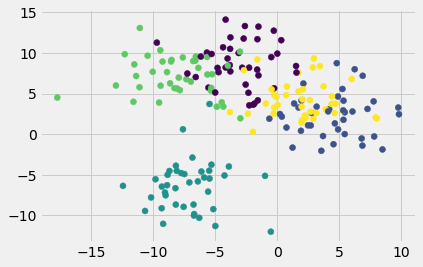

In [22]:
# Plot the points showing the clusters with colors
plt.scatter(features[:, 0], features[:, 1], c=true_labels)
plt.show()

In [23]:
# Get size of the data frame
features.shape

(200, 2)

In [24]:
# Get the first 5 values for the labels (clusters)
true_labels[:5]

array([2, 0, 4, 3, 1])

In [25]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [26]:
# Display the first 5 rows
scaled_features[:5]

array([[-1.40387979, -1.86829675],
       [ 0.01846291,  0.84844414],
       [ 0.07418099, -0.49380251],
       [-0.75443478,  1.08095349],
       [ 1.51891361, -0.06927764]])

<h2>Step 3: K-Means Clustering</h2>

In [27]:
# Configure k-means to cluster by 3 clusters
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [28]:
# Fit the provided dataset to k-means model
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [29]:
# Display the first 5 labels from the clustering
kmeans.labels_[:5]

array([2, 0, 1, 0, 1], dtype=int32)

In [30]:
# Configure k-means to cluster by 5 clusters
kmeans5 = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)

# Fit the dataset to k-means model
kmeans5.fit(scaled_features)

KMeans(init='random', n_clusters=5, random_state=42)

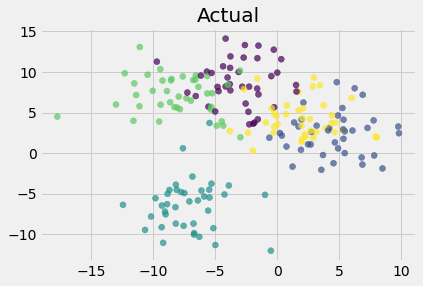

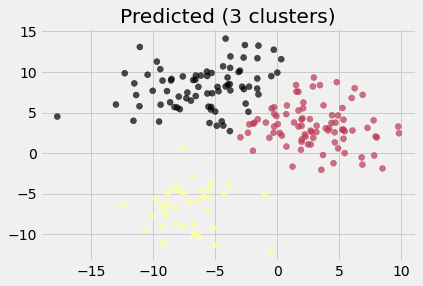

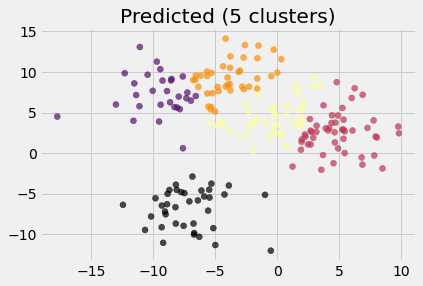

In [31]:
# Plot the actual, predicted clusters with 3 and 5 clusters
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots()
plt.scatter(features[:, 0], features[:, 1], c=true_labels, alpha=0.7)
plt.title('Actual')
plt.show()
plt.scatter(features[:, 0], features[:, 1], c=kmeans.labels_, cmap = plt.get_cmap('inferno'), alpha=0.7)
plt.title('Predicted (3 clusters)')
plt.show()
plt.scatter(features[:, 0], features[:, 1], c=kmeans5.labels_, cmap = plt.get_cmap('inferno'), alpha=0.7)
plt.title('Predicted (5 clusters)')
plt.show()

In [14]:
# Configure a k-means model without definiing the number of clusters
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Calculate sum of squared errors for each cluster size
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

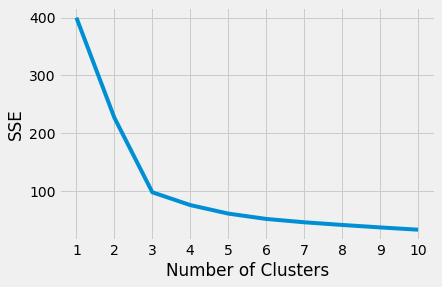

In [15]:
# Plot the SSE by the number of clusters
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()